In [1]:
import numpy as np
import matplotlib.pyplot as plt

from enterprise.signals.signal_base import function as enterprise_function, PTA
from enterprise.signals.deterministic_signals import Deterministic
from enterprise.signals.parameter import Uniform
from enterprise.signals.gp_signals import MarginalizingTimingModel
from enterprise.signals.white_signals import MeasurementNoise
from enterprise.pulsar import Pulsar
import enterprise
from PTMCMCSampler.PTMCMCSampler import PTSampler as ptmcmc
import nestle

In [2]:
datadir = f"{enterprise.__path__[0]}/datafiles/mdc_open1"
parfile = f"{datadir}/J0030+0451.par"
timfile = f"{datadir}/J0030+0451.tim"

psr = Pulsar(parfile, timfile)

[tempo2Util.C:396] Warning: [TIM1] Please place MODE flags in the parameter file 


In [3]:
def hms_to_rad(hh, mm, ss):
    sgn = np.sign(hh)
    return sgn * (sgn * hh + mm / 60 + ss / 3600) * np.pi / 12


def dms_to_rad(dd, mm, ss):
    sgn = np.sign(dd)
    return sgn * (sgn * dd + mm / 60 + ss / 3600) * np.pi / 180

In [4]:
tref1 = (max(psr.toas)+min(psr.toas))/2

In [5]:
tref1=0

In [6]:
from gw_waveform_res import hyp_pta_res

In [7]:
RA_GW = hms_to_rad(4, 0, 0)
DEC_GW = dms_to_rad(-45, 0, 0)


In [8]:
inc0=0;M0=1e10;q0=1;b0=60;e0=1.15;z0=0.3;

hyp_gw =hyp_pta_res(
    cos_gwtheta=np.sin(DEC_GW),
    gwphi=RA_GW,
    psi=0,
    cos_inc=np.cos(inc0),
    log10_M=np.log10(M0),
    q=q0,
    b=b0,
    e0=e0,
    tref=tref1,
    log10_z=np.log10(z0))


hyp_gw_fn = hyp_gw(name="hyp_gw", psr=psr)

res = hyp_gw_fn()

In [9]:
import json
import os

import enterprise
import libstempo as lst
import libstempo.plot as lstplot
import libstempo.toasim as toasim
import matplotlib.pyplot as plt
import numpy as np
from gw_waveform_res import hyp_pta_res

In [10]:
output_dir = "gwhyp_sims"
if not os.path.exists(output_dir):
    os.mkdir(output_dir)

In [11]:
psr = lst.tempopulsar(parfile=parfile, timfile=timfile)
print(psr.name)

J0030+0451


/var/folders/9p/fjprxwnn299bw58l273k34qc0000gn/T/ipykernel_2040/3650358881.py:1: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  psr = lst.tempopulsar(parfile=parfile, timfile=timfile)


In [12]:
def save_psr_sim(psr, savedir):
    print("Writing simulated data for", psr.name)
    psr.savepar(f"{savedir}/{psr.name}_simulate.par")
    psr.savetim(f"{savedir}/{psr.name}_simulate.tim")
    lst.purgetim(f"{savedir}/{psr.name}_simulate.tim")

In [13]:
day_to_s = 24 * 3600

In [14]:
def add_gwecc_1psr(psr):
    toas = (psr.toas() * day_to_s).astype(float)

    signal = (
        np.array(res
            
        )
        
    )

    psr.stoas[:] += signal

    return signal


In [15]:
toasim.make_ideal(psr)

In [16]:
toasim.add_efac(psr, 1)

In [17]:
signal = add_gwecc_1psr(psr)

In [18]:
print("Simulated TOAs for", psr.name)

Simulated TOAs for J0030+0451


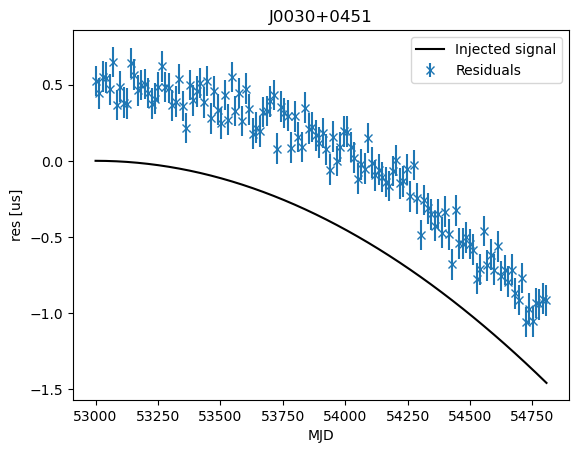

Writing simulated data for J0030+0451


In [20]:
lstplot.plotres(psr, label="Residuals")
plt.plot(psr.toas(), signal * day_to_s * 1e6, c="k", label="Injected signal")
plt.title(psr.name)
plt.legend()
plt.show()
psr.fit()
save_psr_sim(psr, output_dir)